In [7]:
#program version 315

################ tunable parameters

input_file1='default.rules.csv'
# input_file1='borderline1.rules.csv'
input_file1='input-borderline1.rules.csv'
input_file1='input-borderline1-Copy1.rules.csv'
input_file1='input-ltl-r2-2.rules.csv'
# input_file1='input-ltl-r2-12.rules.csv'
# input_file1='input-ltl-r2-18.rules.csv'
input_file1='input-ltl-r3-01.rules.csv'
input_file1='input-ltl-r3-03.rules.csv'
input_file1='input-ltl-r3-03-Copy1.rules.csv'

output_file1='output-2.rules.csv'
output_file1='output-borderline1-2.rules.csv'
output_file1='output-ltl-r2-02.rules.csv'
output_file1='output-ltl-r3-0.rules.csv'

#unit1=100#1250#600#1500#800#900#400#200#100#50#1000#256#128
##wt=1800##3000#2400#1800#1500#1200#900#700
w2=1600#800#200#500#400#200#100#50#1000#256#128#16#25
h2=30#w2#16
#maxtime=4*unit1 #*2
maxtime=w2#*2 #*4#*2
halftime=maxtime//2
##niter =wt#600#500#400#300#6##1000#500###800 # #1500
step1=12 #4 #20 #8 #15 #5 #1 #37 #2
#step2=120#12#60 #120 #1


<IPython.core.display.Javascript object>


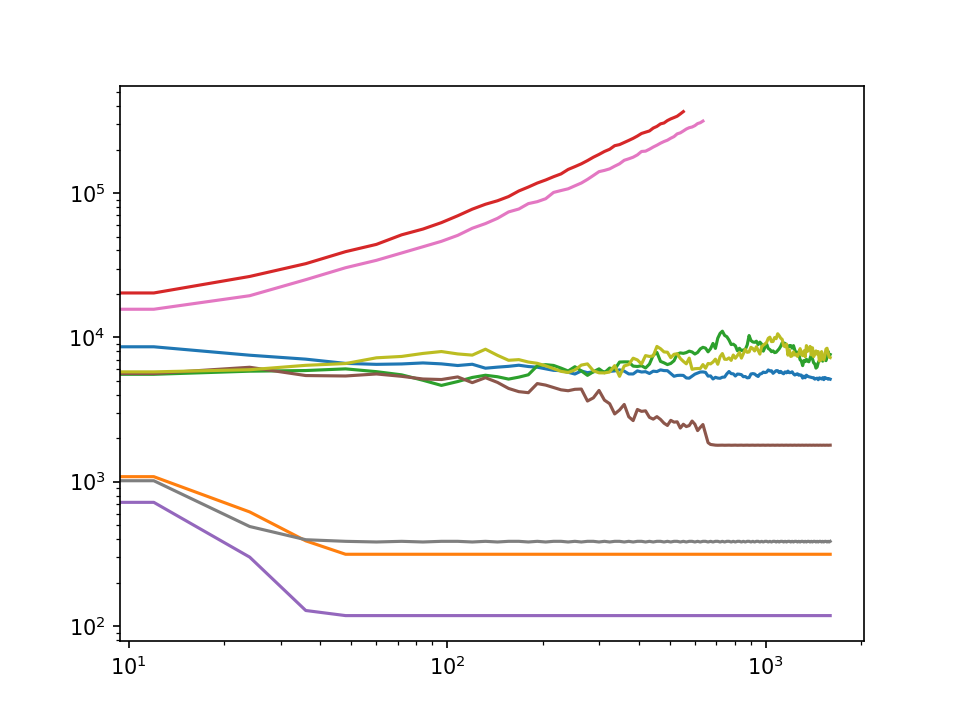

tag1 time_s time11 pop_s population ratio_s PPratio space_s w2 h2 w h rule_s rulespace rulestr x sumpop
soup time 1596 pop 5134 ratio 0.9 space 1600 30 2454 1218 rule lifelib b3s23 sumpop 9180960 
soup time 1596 pop 314 ratio 1.0 space 1600 30 1365 38 rule lifelib r3b14t17s14t22 sumpop 543108 
soup time 1596 pop 7610 ratio 0.8 space 1600 30 1578 1808 rule lifelib r3b14t17s14t23 sumpop 11978088 
soup time 564 pop 373300 ratio 2.2 space 1600 30 2399 917 rule lifelib r3b14t17s14t24 sumpop 103477284 
soup time 1596 pop 118 ratio 1.0 space 1600 30 1222 34 rule lifelib r3b14t18s14t22 sumpop 223896 
soup time 1596 pop 1791 ratio 1.0 space 1600 30 1647 696 rule lifelib r3b14t18s14t23 sumpop 4157640 
soup time 648 pop 321090 ratio 2.2 space 1600 30 2400 971 rule lifelib r3b14t18s14t24 sumpop 102224184 
soup time 1596 pop 386 ratio 1.0 space 1600 30 1485 48 rule lifelib r3b14t19s14t22 sumpop 647676 
soup time 1596 pop 7242 ratio 1.0 space 1600 30 1708 1567 rule lifelib r3b14t19s14t23 sumpop 1208

In [8]:
from __future__ import print_function

%matplotlib notebook
##%matplotlib inline
from matplotlib import pyplot as plt

import math
import lifelib


###################

plt.figure()

##plt.yscale('log')
plt.loglog()

plt.ion()
##plt.ioff()

###################


#schema1='tag1,time_s,time11,pop_s,population,ratio_s,PPratio,log2PP,space_s,w2,h2,w,h,rule_s,rulespace,rulestr'
schema1='tag1,time_s,time11,pop_s,population,ratio_s,PPratio,space_s,w2,h2,w,h,rule_s,rulespace,rulestr,x,sumpop'
print(schema1.replace(',',' '))

###################


with open(input_file1) as f0:
    input1=f0.read()

sp0=input1.splitlines()

for sp01 in sp0:
    
    
    if not sp01: continue ###

    
    sp5=sp01.split()
    #print(sp5)
    i5=sp5.index('lifelib')
    rulestr=sp5[i5+1]
    #print(rulestr)
    space1=' '
    rest1=space1.join(sp5[i5+2:])
    #print(rest1)
    
#for dbs in range(-ndbs,ndbs+1):
##for dbs in range(-1,2):
##for dbmax in range(ndbmax):

    #bmin=bmin0#+dbs
    #bmax=bmax0+dbs
    #smin=smin0#+dbs
    #smax=smax0#+dbs

    #rulestr='b3s23'
    #rulestr='r2b7t12s7t10'  ## niter <2000 or too much memory ? RADEJI ZATIM NEDAVAT DO FORUM
    #rulestr='b{}s23'.format(bmax)
    ######rulestr='r1b3t{}s3t4'.format(bmax)
    ##rulestr='r2b7t12s7t10'.format(bmax)
    #rulestr='r{}b{}t{}s{}t{}'.format(r,bmin,bmax,smin,smax)
    
    
    ###################

    ##sess = lifelib.load_rules(rulestr)

    try:
        sess = lifelib.load_rules(rulestr)
        #1/0
    except:
        exc_info1=sys.exc_info()
        #print("Unexpected error:", exc_info1[0])#, exc_info1[1])
        print("error:", exc_info1[0], exc_info1[1])
        #raise
        continue
    
    #####################
    
    
    
    lt = sess.lifetree()

    p1=lt.pattern()
    p=0.3###08#02#05 #1#2#3#4#5 
    p1[0:h2, 0:w2] = p

    ################################


    pops = []
    gens = []
    hs=[]
    ws=[]
    ys=[]
    
    #####p1 = p1[niter]

    population_niter = None
    sumpopeverygen=0
    
    ##currgen = 0
    ##for _ in range(int(niter/step2)):
    for currgen in range(0,  maxtime, step1):
        
        ####
        
        p1=p1[step1]
        
        ####
        sumpopeverygen += p1.population * step1
        
        if sumpopeverygen> 100e6:#500e6:
            break
        
        ####
        
        if currgen//step1 == halftime//step1:
            population=p1.population ;  population_niter = population


        pops.append(p1.population)
        gens.append(currgen)
        
        bb=p1.bounding_box
        h=1
        w=1
        if bb:
            h=bb[2]-bb[0]
            w=bb[3]-bb[1]
        hs.append(h)
        ws.append(w)
        #ys.append(p1.population/h)
        ys.append(p1.population/(1+currgen))
            
            
#     !free -m

    #######################################

    plt.plot(gens, pops)
    #plt.plot(gens, hs)
    ###plt.plot(gens, pops/hs)
#     plt.plot(gens, ys)
    plt.show()

    
    #######################################

#     bb=p1.bounding_box
#     print(bb)

#     h=1
#     w=1
#     if bb:
#         h=bb[2]-bb[0]
#         w=bb[3]-bb[1]

#     tag1='soup'
#     time_s='time'
#     time11=niter
#     pop_s='pop'
#     space_s='space'
#     rule_s='rule'
#     rulespace='lifelib'

    #print(tag1,time_s,time11,pop_s,population,space_s,w2,h2,w,h,rule_s,rulespace,rulestr)

    #######################################

    #####p1 = p1[niter]

    #######################################

    bb=p1.bounding_box
    #print(bb)

    h=1
    w=1
    if bb:
        h=bb[2]-bb[0]
        w=bb[3]-bb[1]


    tag1='soup'
    time_s='time'
    time11=currgen  ###  maxtime
    pop_s='pop'
    population=p1.population ;  population_2niter = population
    space_s='space'
    rule_s='rule'
    rulespace='lifelib'

    ratio_s='ratio'
    ######fPPratio= population_2niter/population_niter
    #######fPPratio= population_2niter/(population_niter+1)
    fPPratio= population_2niter/(pops[currgen//step1//2]+1)
    PPratio= '{:.1f}'.format(fPPratio)
    #log2PP= '{:.1f}'.format(math.log2(fPPratio) )

    #print(tag1,time_s,time11,pop_s,population,ratio_s,PPratio,log2PP,space_s,w2,h2,w,h,rule_s,rulespace,rulestr)
    #print(tag1,time_s,time11,pop_s,population,ratio_s,PPratio,space_s,w2,h2,w,h,rule_s,rulespace,rulestr)
    #print(tag1,time_s,time11,pop_s,population,ratio_s,PPratio,space_s,w2,h2,w,h,rule_s,rulespace,rulestr,rest1)
    print(tag1,time_s,time11,pop_s,population,ratio_s,PPratio,space_s,w2,h2,w,h,rule_s,rulespace,rulestr, 'sumpop' , sumpopeverygen,    rest1)
    with open(output_file1,'a') as f1:
        #print(tag1,time_s,time11,pop_s,population,ratio_s,PPratio,log2PP,space_s,w2,h2,w,h,rule_s,rulespace,rulestr, file=f1)
        print(tag1,time_s,time11,pop_s,population,ratio_s,PPratio,space_s,w2,h2,w,h,rule_s,rulespace,rulestr,  'sumpop' , sumpopeverygen,    rest1, file=f1)

   
    #####################################
    ##del p1
    ##del lt
    ##del sess
    #!free -m

!free -m

#p1.viewer()


In [11]:
p1.population

6448

In [3]:
!free -m
!top -b -n 1 | grep pyt

              total        used        free      shared  buff/cache   available
Mem:           4429        1396        2077          28         955        2750
Swap:           759          23         735
 1858 martin    20   0  346876  67096  13788 S  0,0  1,5   1:43.21 jupyter-not+
 7030 martin    20   0 1151504 355880  26328 R  0,0  7,8   0:02.76 python3
 7549 martin    20   0   52672  12852   7316 S  0,0  0,3   0:00.03 python3
 7554 martin    20   0   52672  12876   7344 S  0,0  0,3   0:00.03 python3
 7559 martin    20   0   52748  12976   7440 S  0,0  0,3   0:00.03 python3


In [35]:
#
import sys

try:
    sess = lifelib.load_rules('sffdsdfsfd')
    #1/0
except:
    exc_info1=sys.exc_info()
    #print("Unexpected error:", exc_info1[0])#, exc_info1[1])
    print("error:", exc_info1[0], exc_info1[1])
    #raise

Generating code for rules ['sffdsdfsfd']...
error: <class 'ValueError'> Rule "sffdsdfsfd" does not belong to any genus


In [25]:
math.exp(0.7*math.log(2))

1.624504792712471